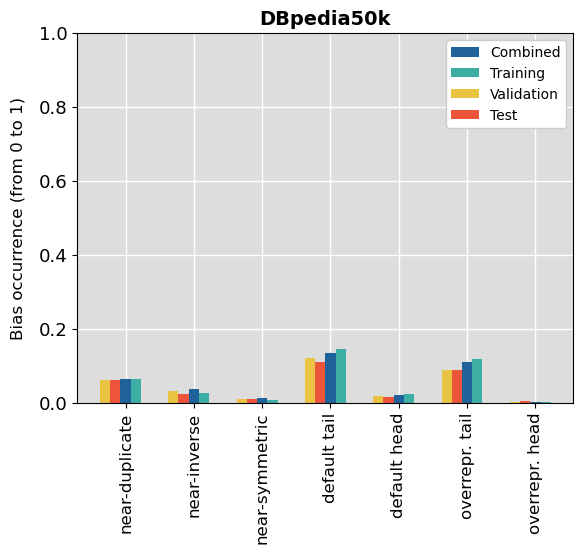

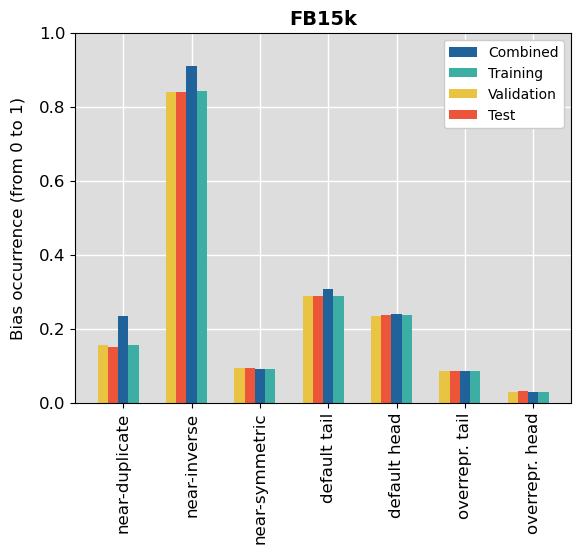

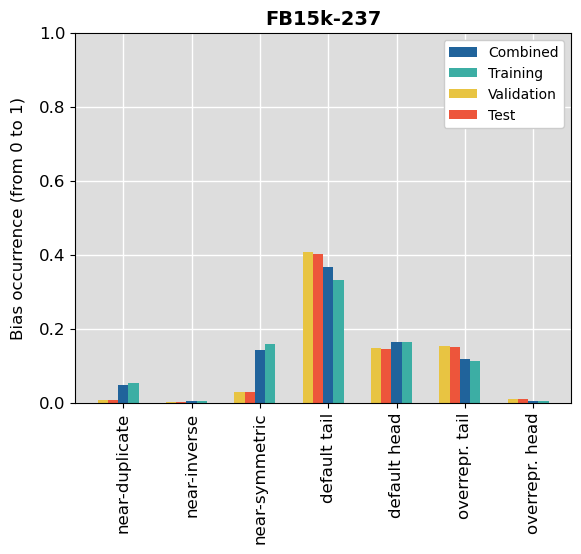

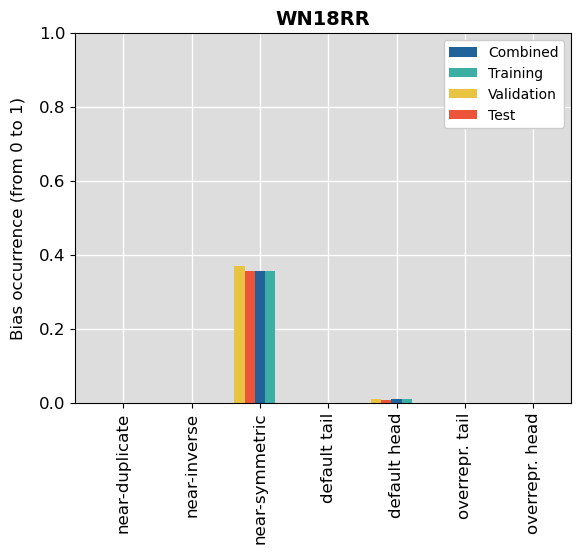

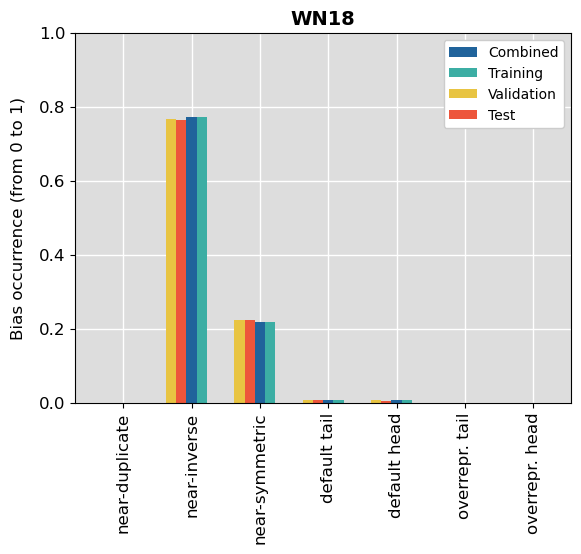

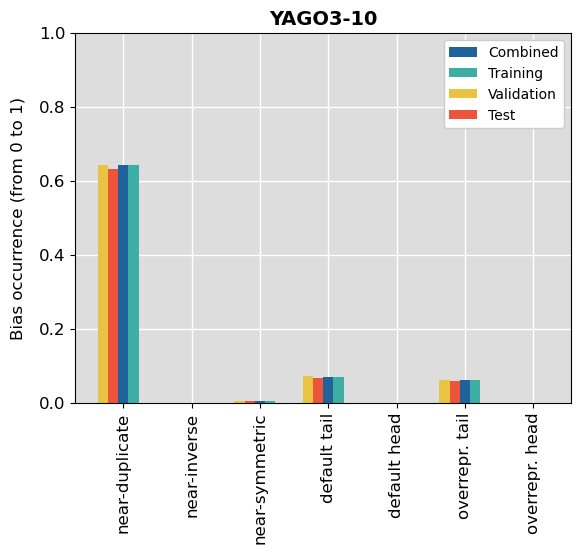

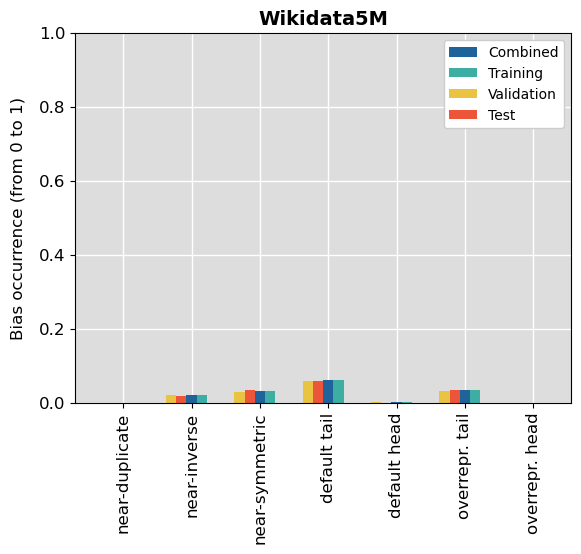

In [89]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
import pandas as pd

plt.rcParams['axes.facecolor'] = '#dddddd'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.linewidth'] = 1
plt.rcParams['grid.color'] = "#ffffff"
plt.rcParams['axes.axisbelow'] = True
label_color = '#000000'
primaryColor = '#20639b'
plt.rcParams['text.color'] = label_color
plt.rcParams['axes.labelcolor'] = label_color
plt.rcParams['xtick.color'] = label_color
plt.rcParams['ytick.color'] = label_color
    
triple_stats = pd.read_csv(os.getcwd() + "/data/split_statistics/triples.csv")
bias_stats = pd.read_csv(os.getcwd() + "/data/bias_affected_triples/combined.csv")
bias_test_stats = pd.read_csv(os.getcwd() + "/data/bias_affected_triples/test.csv")
bias_training_stats = pd.read_csv(os.getcwd() + "/data/bias_affected_triples/train.csv")
bias_validation_stats = pd.read_csv(os.getcwd() + "/data/bias_affected_triples/validation.csv")
datasets = triple_stats["dataset"].to_list()
bias_types = list(bias_stats)[1:]
dataset_triple_count = {dataset: triple_stats.loc[triple_stats['dataset'] == dataset]["tripleCountTotal"].values[0] for dataset in datasets}
test_triple_count = {dataset: triple_stats.loc[triple_stats['dataset'] == dataset]["tripleCountTest"].values[0] for dataset in datasets}
training_triple_count = {dataset: triple_stats.loc[triple_stats['dataset'] == dataset]["tripleCountTraining"].values[0] for dataset in datasets}
validation_triple_count = {dataset: triple_stats.loc[triple_stats['dataset'] == dataset]["tripleCountValidation"].values[0] for dataset in datasets}

biased_triples = {dataset: [bias_stats.loc[bias_stats['dataset'] == dataset][biasType].values[0]/dataset_triple_count[dataset] for biasType in bias_types] for dataset in datasets}
biased_test_triples = {dataset: [bias_test_stats.loc[bias_test_stats['dataset'] == dataset][biasType].values[0]/test_triple_count[dataset] for biasType in bias_types] for dataset in datasets}
biased_training_triples = {dataset: [bias_training_stats.loc[bias_training_stats['dataset'] == dataset][biasType].values[0]/training_triple_count[dataset] for biasType in bias_types] for dataset in datasets}
biased_validation_triples = {dataset: [bias_validation_stats.loc[bias_validation_stats['dataset'] == dataset][biasType].values[0]/validation_triple_count[dataset] for biasType in bias_types] for dataset in datasets}
labels_mapping = {"overrepresentedTail" : "overrepr. tail", "overrepresentedHead" : "overrepr. head", 
"defaultTailAnswers": "default tail", "defaultHeadAnswers": "default head",
"duplicateRelations": "near-duplicate",
"inverseRelations": "near-inverse",
"symmetricalRelations": "near-symmetric"
}    
for dataset in biased_triples:
    x = [labels_mapping[bias] for bias in bias_types]
    ind = np.arange(len(x)) 
    data_combined = biased_triples[dataset]
    data_training = biased_training_triples[dataset]
    data_validation = biased_validation_triples[dataset]
    data_test = biased_test_triples[dataset]

   
    width = 0.15
    fig, ax = plt.subplots()
    
    ax.bar(x, data_combined, width, color=primaryColor,label="Combined")
    ax.bar(ind + width, data_training, width, color='#3caea4', label='Training')
    ax.bar(ind - 2*width, data_validation, width, color='#e8c442', label='Validation')
    ax.bar(ind - width, data_test, width, color='#ed553b', label='Test')


    #fig.suptitle(dataset,fontsize=12, fontweight="bold",)
    ax.set_title(dataset, fontsize=14, fontweight="bold")
    ax.set_ylabel('Bias occurrence (from 0 to 1)', fontsize=12, labelpad=10)

    #set tick parameters 
    ax.tick_params(labelbottom=True)
    ax.set_ylim(0, 1.0)

    #show grid below the bars
    #ax.grid(axis='x')
    ax.legend(facecolor='white', framealpha=1)    
    plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=12) 
    plt.xticks(rotation=90)
    plt.savefig("output/pattern_analysis/{}.png".format(dataset), bbox_inches="tight", dpi=300)
    plt.show()


